## Lab 5 - Seaborn and Statistics

Julia Beitel - Big Data - October 26, 2018

In [71]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns #updraded seaborn as 0.9.0 in anaconda
import statsmodels.api as sm
import statsmodels.formula.api as smf

#makes graph visible in this notebook
%matplotlib inline

In [58]:
#apply the default seasborn theme, scaling, and color palette
#can be changed later
sns.set()

#load the test dataset tips from seaborn
tips = sns.load_dataset("tips")
tips.info() #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [59]:
#descriptive data
tips.describe() #description of numerical categories

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [60]:
#should always run descriptive data analysis when looking at a new data set
tips.head() #plotting information

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


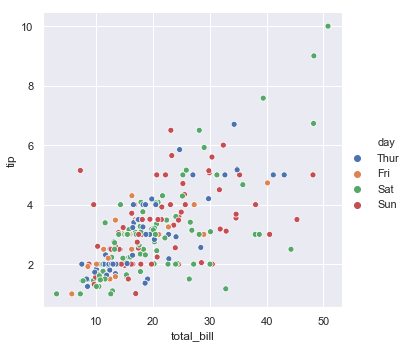

In [61]:
#plot the data using relplot (realtional plot, which is a subset of linear model plotting)
#display a graph plotting total bill on x axis, tip$ on y axis, as scatterplot for multiple days
sns.relplot(x="total_bill", y="tip", hue="day", data=tips, kind="scatter")

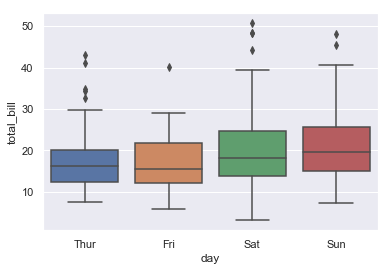

In [62]:
#boxplot comparing total bill and day of the week
sns.boxplot(x="day", y="total_bill", data=tips)

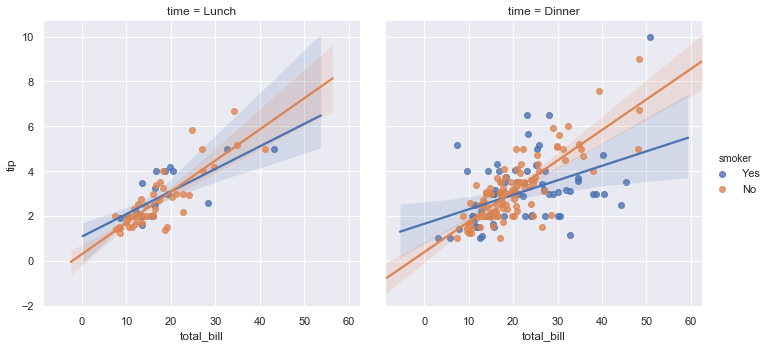

In [63]:
#can also use lmplot (linear model plot)- 95% confidence interval 
sns.lmplot(x = "total_bill", y = "tip", col="time", hue="smoker", data = tips)

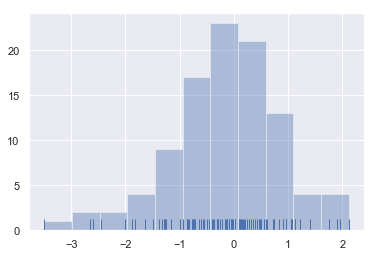

In [64]:
#histogram with rug
sns.distplot(x, kde=False, rug=True)

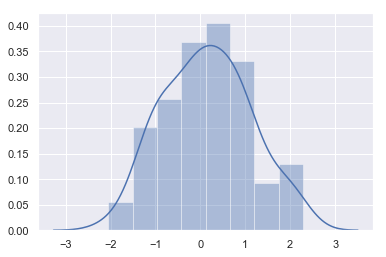

In [65]:
#generating distributions
x = np.random.normal(size=100)
sns.distplot(x);

In [66]:
#import data with stats package
guerry = sm.datasets.get_rdataset("Guerry", "HistData").data
guerry.info

<bound method DataFrame.info of     dept Region           Department  Crime_pers  Crime_prop  Literacy  \
0      1      E                  Ain       28870       15890        37   
1      2      N                Aisne       26226        5521        51   
2      3      C               Allier       26747        7925        13   
3      4      E         Basses-Alpes       12935        7289        46   
4      5      E         Hautes-Alpes       17488        8174        69   
5      7      S              Ardeche        9474       10263        27   
6      8      N             Ardennes       35203        8847        67   
7      9      S               Ariege        6173        9597        18   
8     10      E                 Aube       19602        4086        59   
9     11      S                 Aude       15647       10431        34   
10    12      S              Aveyron        8236        6731        31   
11    13      S     Bouches-du-Rhone       13409        5291        38   
12    

In [67]:
#select the variables we want to examine further, and just look at those 
vars = ['Department', 'Lottery']
small_guerry = guerry[vars]
small_guerry[-5:]

,Department,Lottery
81,Vienne,40
82,Haute-Vienne,55
83,Vosges,14
84,Yonne,51
85,Corse,83


## Iris Dataset: Exploring Comparing Plots

I wanted to learn how to further compare data. I found some of this code on the "Visualizing pairwise relationships in a dataset" on this seaborn link: https://seaborn.pydata.org/tutorial/distributions.html

This code taught me how to compare data using different types of graphs based off of the different types of data (numerical, categorical) and additionally, how to print these graphs all in one window. By using the pairplot() function, I was able to create a grid of Axes where  each variable in the data would by shared in the y-axis in a  row and in the x-axis in a column. 

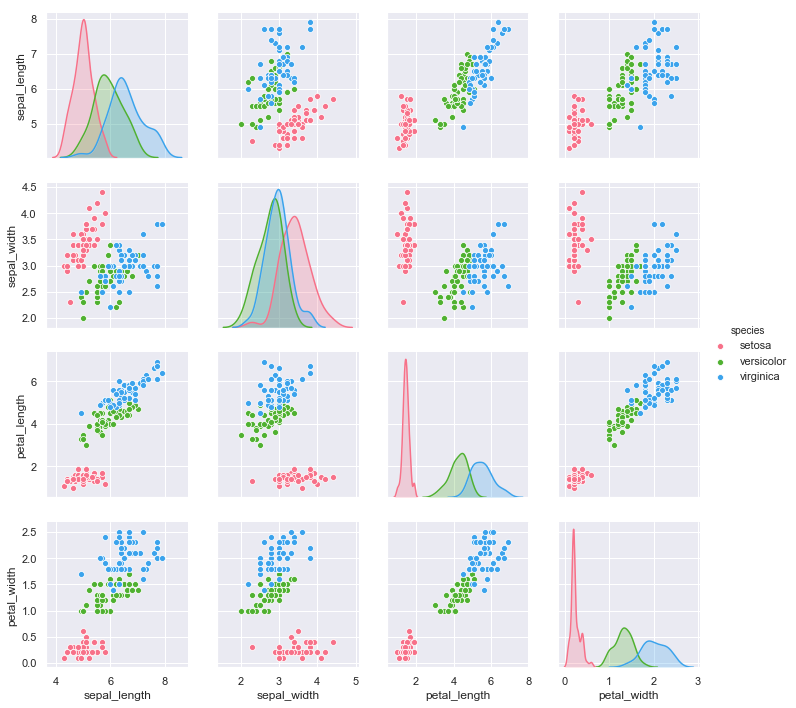

In [68]:
#Here, I used the pairplot() function in order to creates a matrix of axes
iris = sns.load_dataset("iris")
#Here, I set one of the parameters to species in order to differenciate the data futher
#I did this because I wanted to see the relationships of each pair of columns in a dataframs and...
#...this matrix shows the relationship for each pair of columns in the DataFrame
sns.pairplot(iris, hue="species", palette="husl") #uses a different color palette and species variation

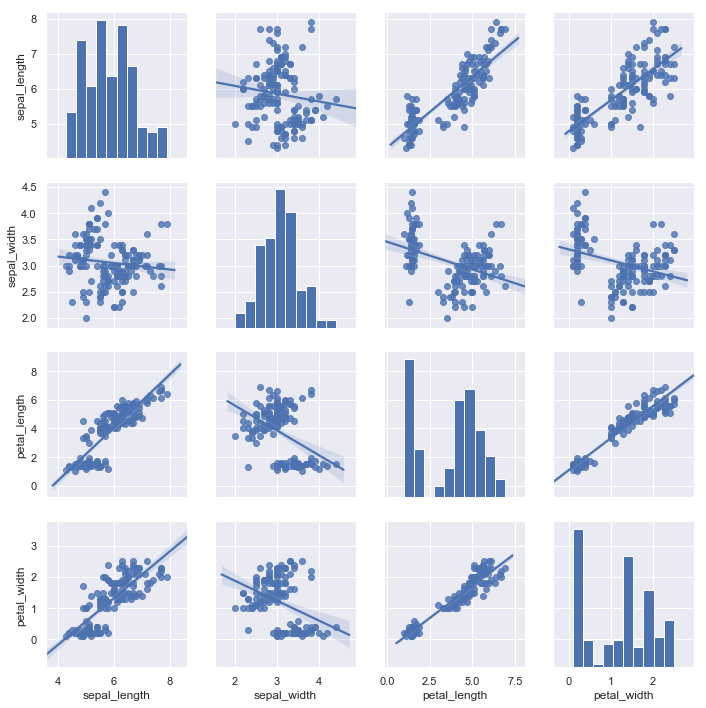

In [69]:
#Additionally, I learned that you could display a pair of plots with regression data
#further shows how the univariate distribution of the data for the variable in that column is displayed
#I did this in order to understand how graphs can both be compared and interpreted through regression lines
sns.pairplot(iris, kind="reg") #these graphs are more basic displays of the data, besides a regression analysis

## Areas for Futher Exploration
.PairGrid() function which is a high-level interface of .PairPlot() that let makes it easy to draw from a few common styles of plotting.

I found some information on the .PairGrid() function from this website: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

I read this because the seaborn website has less information of PairGrid() and more on .PairPlot(). The website told me that "In contrast to the sns.pairplot function, sns.PairGrid is a class which means that it does not automatically fill in the plots for us. Instead, we create a class instance and then we map specific functions to the different sections of the grid."

By reading this article, I learned that pairs plots are provided as a powerful tool to quickly explore distributions and relationships in a dataset. I also learned that they provide us with a complete first look at our data, serving as a great starting point in data analysis projects, much like that of .info() or .describe(). This will help my in my next lab through my first look of my data.  